First 5 rows of raw data:
   Year  Month Number Month      Utility       Owner            Units  \
0  2019             8   Aug   Passengers      Campus              PAX   
1  2019             8   Aug        Water      Tenant  Million Gallons   
2  2019             8   Aug        Water  Commission  Million Gallons   
3  2019             8   Aug  Electricity      Tenant              kWh   
4  2019             8   Aug  Electricity  Commission              kWh   

          Usage  
0  5.750758e+06  
1  1.512082e+01  
2  2.767076e+01  
3  1.251209e+07  
4  1.563947e+07  

Filtered data for Electricity (Tenant):
                 Usage
Date                  
2013-01-01  14002156.0
2013-02-01  12631776.0
2013-03-01  13894596.0
2013-04-01  13548377.0
2013-05-01  13646478.0

Summary statistics:
              Usage
count  8.000000e+01
mean   1.294386e+07
std    6.794222e+05
min    1.115129e+07
25%    1.244844e+07
50%    1.305550e+07
75%    1.345241e+07
max    1.424900e+07


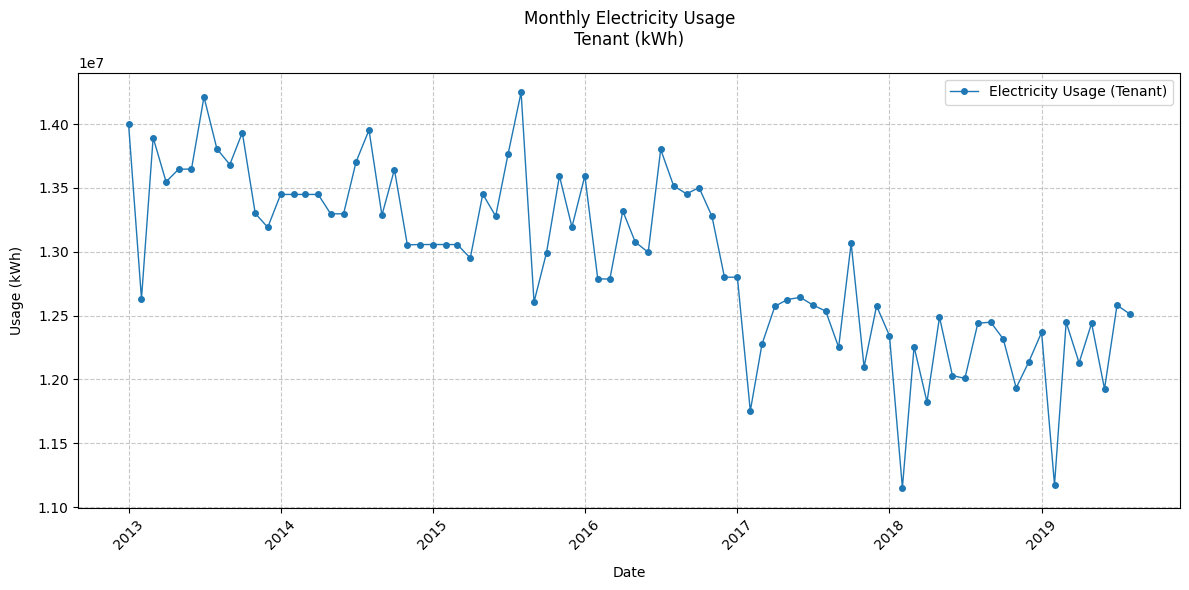

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration ---
file_path = 'C:/Users/USER/Downloads/MEC.csv'
year_column = 'Year'
month_column = 'Month'  # Column with month names ('Aug', 'Jul', etc.)
utility_column = 'Utility'
owner_column = 'Owner'
value_column = 'Usage'
units_column = 'Units'  # Column containing units of measurement
utility_to_analyze = 'Electricity'  # Options: 'Electricity', 'Water', 'Gas', 'Passengers'
owner_to_analyze = 'Tenant'  # Options: 'Tenant' or 'Commission'

# --- Load and prepare data ---
try:
    # Load data
    df = pd.read_csv(file_path)
    print("First 5 rows of raw data:")
    print(df.head())
    
    # Check for required columns
    required_columns = [year_column, month_column, utility_column, 
                       owner_column, value_column, units_column]
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise KeyError(f"Missing required columns: {missing_columns}")

    # Create datetime index
    df['Date'] = pd.to_datetime(
        df[year_column].astype(str) + '-' + df[month_column],
        format='%Y-%b'
    )
    df.set_index('Date', inplace=True)
    
    # Filter data
    mask = (df[utility_column] == utility_to_analyze) & (df[owner_column] == owner_to_analyze)
    filtered_df = df[mask].copy()
    
    if filtered_df.empty:
        available_utilities = df[utility_column].unique()
        available_owners = df[owner_column].unique()
        raise ValueError(
            f"No data found for {utility_to_analyze}/{owner_to_analyze}\n"
            f"Available utilities: {available_utilities}\n"
            f"Available owners: {available_owners}"
        )
    
    # Get units for labeling
    units = filtered_df[units_column].iloc[0] if units_column in filtered_df.columns else ''
    
    # Prepare final DataFrame
    result_df = filtered_df[[value_column]].sort_index()
    result_df = result_df.dropna()

    print(f"\nFiltered data for {utility_to_analyze} ({owner_to_analyze}):")
    print(result_df.head())
    print("\nSummary statistics:")
    print(result_df.describe())

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except KeyError as e:
    print(f"Column Error: {e}\nAvailable columns: {df.columns.tolist()}")
    exit()
except ValueError as e:
    print(f"Data Error: {e}")
    exit()
except Exception as e:
    print(f"Unexpected error: {e}")
    exit()

# --- Visualization ---
if not result_df.empty:
    plt.figure(figsize=(12, 6))
    
    # Plot data
    plt.plot(result_df.index, result_df[value_column], 
             marker='o', linestyle='-', linewidth=1, markersize=4,
             label=f'{utility_to_analyze} Usage ({owner_to_analyze})')
    
    # Format plot
    plt.title(f'Monthly {utility_to_analyze} Usage\n{owner_to_analyze} ({units})', pad=20)
    plt.xlabel('Date', labelpad=10)
    plt.ylabel(f'Usage ({units})', labelpad=10)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()
else:
    print("No data available for visualization")